In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class CubicSpline:
    def __init__(self, xvalues, yvalues):
        self.xvalues = np.array(xvalues)
        self.yvalues = np.array(yvalues)
        self.h = None
        self.dy = None
        self.M = None
        self.right = None
        self.MatH = None

    def evaluate(self):
        self.h = np.diff(self.xvalues)
        self.dy = np.diff(self.yvalues)
        n = len(self.xvalues)
        self.M = np.zeros(n)
        self.right = np.zeros(n - 2)

        for i in range(n - 2):
            self.right[i] = (self.dy[i+1] / self.h[i+1]) - (self.dy[i] / self.h[i])
        self.right *= 6

        self.MatH = np.zeros((n - 2, n - 2))
        for i in range(n - 2):
            self.MatH[i, i] = 2 * (self.h[i] + self.h[i+1])
            if i > 0:
                self.MatH[i, i-1] = self.h[i]
            if i < n - 3:
                self.MatH[i, i+1] = self.h[i+1]

        self.M[1:n-1] = np.linalg.solve(self.MatH, self.right)
        return self.M

    def cubic_func(self, x, i):
        h = self.h[i]
        xi, xi1 = self.xvalues[i], self.xvalues[i+1]
        yi, yi1 = self.yvalues[i], self.yvalues[i+1]
        Mi, Mi1 = self.M[i], self.M[i+1]
        term1 = Mi1 * (x - xi)**3 / (6 * h)
        term2 = Mi * (xi1 - x)**3 / (6 * h)
        term3 = (yi1 / h - Mi1 * h / 6) * (x - xi)
        term4 = (yi / h - Mi * h / 6) * (xi1 - x)
        return term1 + term2 + term3 + term4

    def calculate(self):
        X_range = np.linspace(self.xvalues[0], self.xvalues[-1], 100)
        Y_range = np.zeros(len(X_range))
        for i, x in enumerate(X_range):
            j = max(0, np.searchsorted(self.xvalues, x) - 1)
            if j >= len(self.h):  
                j = len(self.h) - 1
            Y_range[i] = self.cubic_func(x, j)
        plt.plot(X_range, Y_range, label="Cubic Spline")
        plt.plot(self.xvalues, self.yvalues, 'o', label="Data Points")
        plt.legend()
        plt.grid(True)
        plt.title("Natural Cubic Spline Interpolation-{Asmit Khanal}")
        plt.show()


In [56]:
cs=CubicSpline([1,2,4,6,9],[15,14,10,14,16])
cs.evaluate()

array([ 0.        , -2.32692308,  3.98076923, -1.59615385,  0.        ])

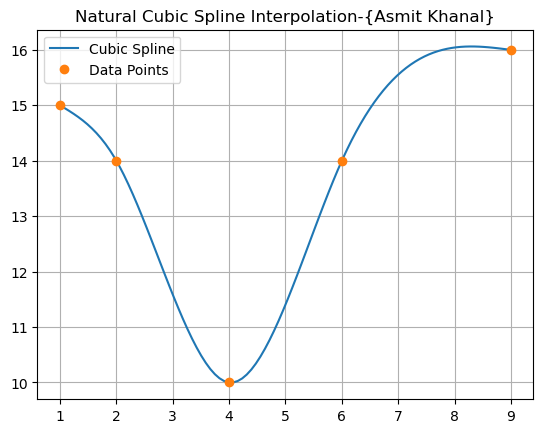

In [57]:
cs.calculate()